# Messages list as a State
# Tool calling in LangGraph

In [1]:
from typing import Literal
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import END, StateGraph, MessagesState

# Initialize the OpenAI model
model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [2]:
model.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0f03d4f0ee', 'finish_reason': 'stop', 'logprobs': None}, id='run-48280ba5-c36f-4df4-a287-84f06a2527c7-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17})

In [5]:
# source: https://langchain-ai.github.io/langgraph/#step-by-step-breakdown
# Function to call the model
def call_model(state: MessagesState):
    response = model.invoke(state['messages'])
    return {"messages": [response]}
# Define the workflow
# we initialize graph (StateGraph) by passing state schema (in our case MessagesState)
# MessagesState is a prebuilt state schema that has one attribute -- 
# a list of LangChain Message objects, as well as logic for merging the updates from each node into the state
workflow = StateGraph(MessagesState)
workflow.add_node("agent", call_model)
workflow.set_entry_point("agent")
app = workflow.compile()
response = app.invoke({"messages": [HumanMessage(content="Tell me a joke")]})
response

{'messages': [HumanMessage(content='Tell me a joke', id='f7546a65-f2fc-47cc-ba64-e7955a543ffc'),
  AIMessage(content='Why did the scarecrow win an award? \n\nBecause he was outstanding in his field!', response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 11, 'total_tokens': 29}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0f03d4f0ee', 'finish_reason': 'stop', 'logprobs': None}, id='run-58328404-7aa1-4bb4-bc10-b16018d7418c-0', usage_metadata={'input_tokens': 11, 'output_tokens': 18, 'total_tokens': 29})]}

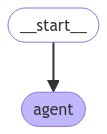

In [7]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())